# 🐶End-to-end Multi-class Dog Breed Classification

This notebook build an end-to-end multi-class image classifier using TensorFlow 2.0 and Tensorflow Hub.


## 1. Problem

Identifying the breed of a dog given an image of a dog.

When I'm sitting at the cafe and I take a Photo of a dog , I want to know what breed of dog it is.


## 2. Data

The data we're  using is from kaggle's dog breed identification.

https://www.kaggle.com/competitions/dog-breed-identification/data

## 3. Evaluation

The evaluation is file with prediction probabilities for each dog breed of each test image.

www.kaggle.com/competitions/dog-breed-identification/overview/evaluation


## 4. Features

Some information about the data:
* We're dealing with images (unstructure image ) so it's probably best we use deep learning /transfer learning .
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training sets (these images have labels).
* There are around 10,000+ images in the test set (these images have no labels , because we'll want to predict them).

### Getting our workspace ready

* Import TensorFlow 2.x
* Import tensorflow Hub
* Make sure we're using GPU

In [1]:
# Import necessary tools
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
print("TF hub version:", hub.__version__)
print("TF version:" , tf.__version__)

TF hub version: 0.13.0
TF version: 2.10.1


In [2]:
# check for GPU availability
print("GPU" , "available (YESSSS!!!!!)" if tf.config.list_physical_devices("GPU") else "not available:(")

GPU available (YESSSS!!!!!)


## Getting our data ready (turning into tensors)
with all machine learning models , our data has to be in numerical format , so that's what we'll be doing first. Turning our images into Tensors (numerical representations). 

Let's start by accessing our data and checking out the labels.

In [3]:
# check out the labels of our data 
labels_csv = pd.read_csv("dog-breed-identification/labels.csv")
print(labels_csv.head())
print(labels_csv.describe())

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever
                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


<Axes: xlabel='breed'>

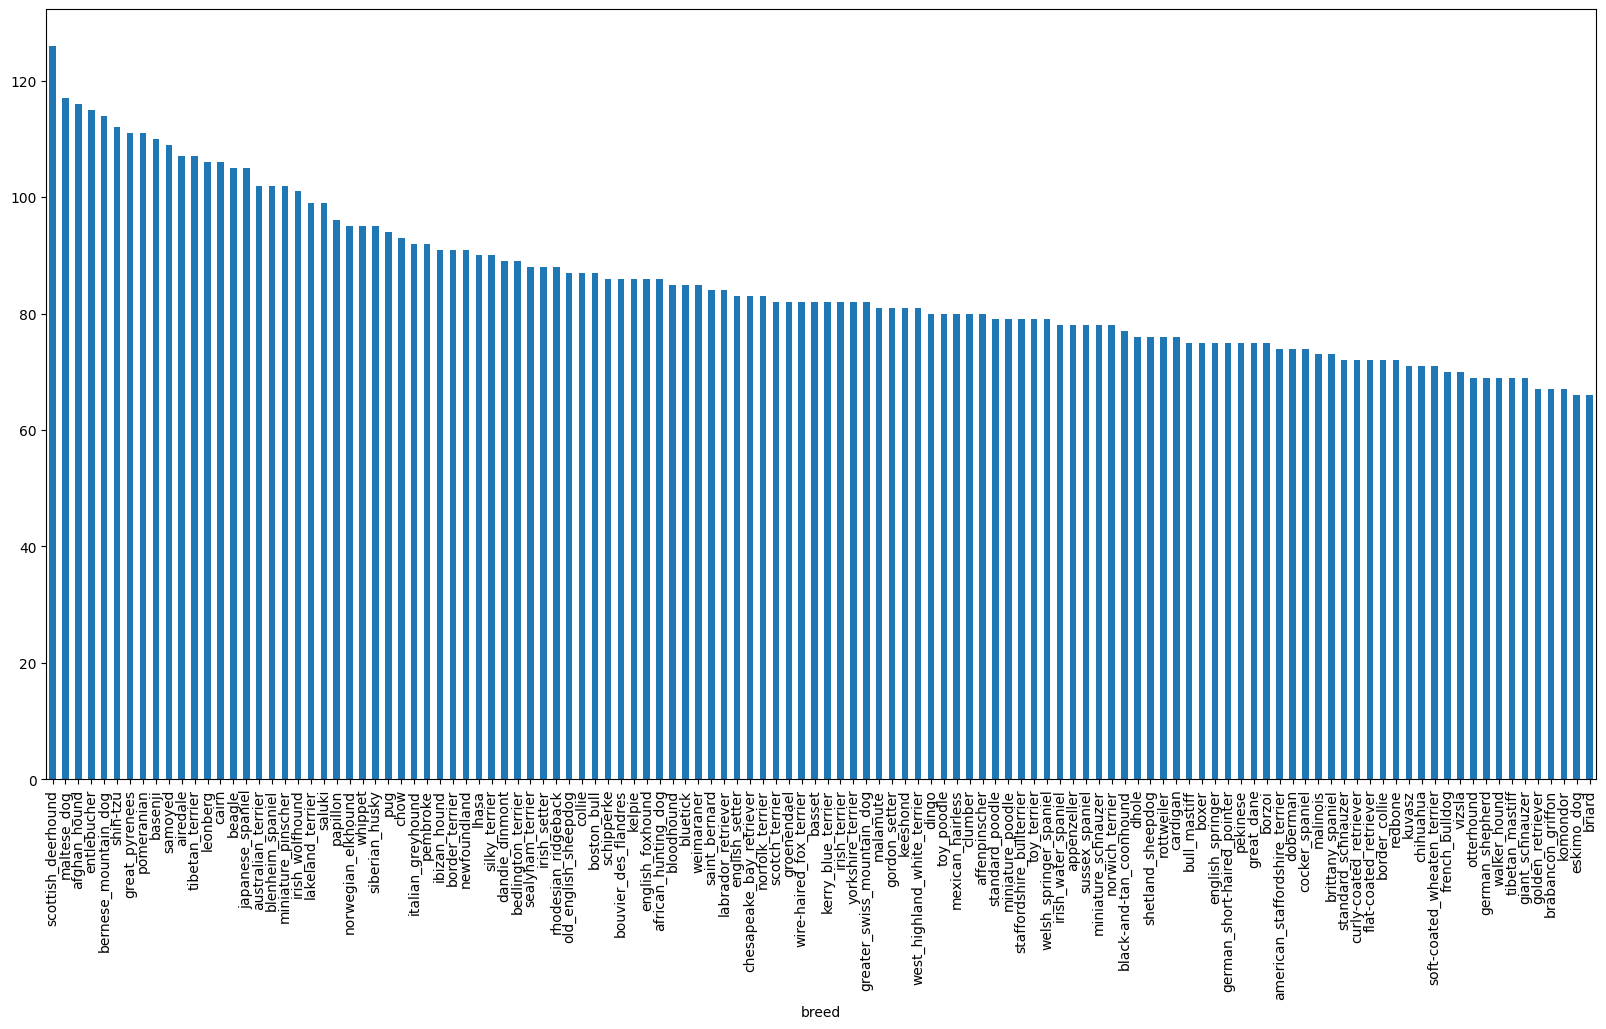

In [4]:
# how many images are there of each breeeds?
labels_csv["breed"].value_counts().plot.bar(figsize = (20 , 10))

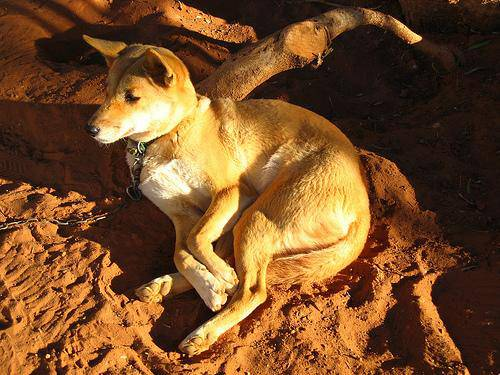

In [5]:
# let's view an image
from IPython.display import Image
Image("dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and their labels
Let's get a list of all of our image file pathnames.

In [6]:
labels_csv["id"]

0        000bec180eb18c7604dcecc8fe0dba07
1        001513dfcb2ffafc82cccf4d8bbaba97
2        001cdf01b096e06d78e9e5112d419397
3        00214f311d5d2247d5dfe4fe24b2303d
4        0021f9ceb3235effd7fcde7f7538ed62
                       ...               
10217    ffd25009d635cfd16e793503ac5edef0
10218    ffd3f636f7f379c51ba3648a9ff8254f
10219    ffe2ca6c940cddfee68fa3cc6c63213f
10220    ffe5f6d8e2bff356e9482a80a6e29aac
10221    fff43b07992508bc822f33d8ffd902ae
Name: id, Length: 10222, dtype: object

In [7]:
len(os.listdir("dog-breed-identification/train/")) ,  os.listdir("dog-breed-identification/train/")

(10222,
 ['000bec180eb18c7604dcecc8fe0dba07.jpg',
  '001513dfcb2ffafc82cccf4d8bbaba97.jpg',
  '001cdf01b096e06d78e9e5112d419397.jpg',
  '00214f311d5d2247d5dfe4fe24b2303d.jpg',
  '0021f9ceb3235effd7fcde7f7538ed62.jpg',
  '002211c81b498ef88e1b40b9abf84e1d.jpg',
  '00290d3e1fdd27226ba27a8ce248ce85.jpg',
  '002a283a315af96eaea0e28e7163b21b.jpg',
  '003df8b8a8b05244b1d920bb6cf451f9.jpg',
  '0042188c895a2f14ef64a918ed9c7b64.jpg',
  '004396df1acd0f1247b740ca2b14616e.jpg',
  '0067dc3eab0b3c3ef0439477624d85d6.jpg',
  '00693b8bc2470375cc744a6391d397ec.jpg',
  '006cc3ddb9dc1bd827479569fcdc52dc.jpg',
  '0075dc49dab4024d12fafe67074d8a81.jpg',
  '00792e341f3c6eb33663e415d0715370.jpg',
  '007b5a16db9d9ff9d7ad39982703e429.jpg',
  '007b8a07882822475a4ce6581e70b1f8.jpg',
  '007ff9a78eba2aebb558afea3a51c469.jpg',
  '008887054b18ba3c7601792b6a453cc3.jpg',
  '008b1271ed1addaccf93783b39deab45.jpg',
  '008ba178d6dfc1a583617470d19c1673.jpg',
  '009509be3ca7cce0ff9e37c8b09b1125.jpg',
  '0097c6242c6f3071762d9f8

In [8]:
# getting the filenames of training data(images)
filenames = ["dog-breed-identification/train/"+fname for fname in os.listdir("dog-breed-identification/train/")]

In [9]:
len(filenames) , filenames

(10222,
 ['dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
  'dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
  'dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
  'dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
  'dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
  'dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
  'dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
  'dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
  'dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
  'dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
  'dog-breed-identification/train/004396df1acd0f1247b740ca2b14616e.jpg',
  'dog-breed-identification/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
  'dog-breed-identification/train/00693b8bc2470375cc744a6391d397ec.jpg',
  'dog-breed-identification/train/006cc3ddb

Since we've got filenames and now the time for the labels to be prepared a/c to their ids 

In [10]:
# getting labels of breeds a/c to their id 
labels = labels_csv["breed"].to_numpy()
len(labels) , labels

(10222,
 array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
        'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object))

In [11]:
type(labels)

numpy.ndarray

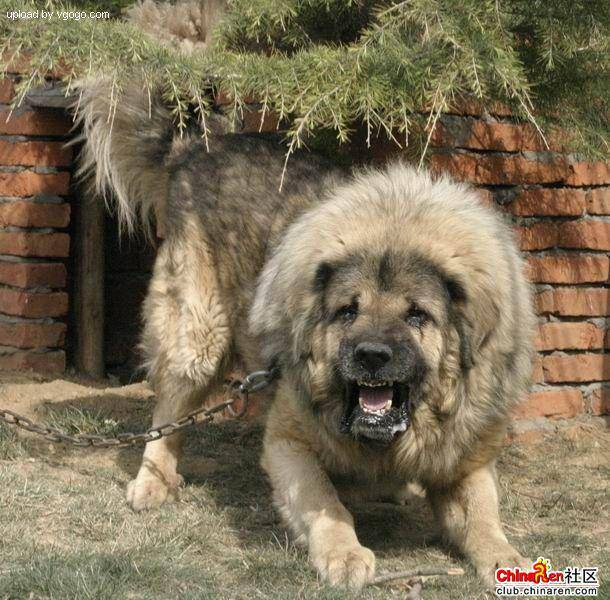

In [12]:
Image(filenames[9000])

In [13]:
labels[9000]

'tibetan_mastiff'

In [14]:
# find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds) , unique_breeds

(120,
 array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
        'american_staffordshire_terrier', 'appenzeller',
        'australian_terrier', 'basenji', 'basset', 'beagle',
        'bedlington_terrier', 'bernese_mountain_dog',
        'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
        'bluetick', 'border_collie', 'border_terrier', 'borzoi',
        'boston_bull', 'bouvier_des_flandres', 'boxer',
        'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
        'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
        'chow', 'clumber', 'cocker_spaniel', 'collie',
        'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
        'doberman', 'english_foxhound', 'english_setter',
        'english_springer', 'entlebucher', 'eskimo_dog',
        'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
        'german_short-haired_pointer', 'giant_schnauzer',
        'golden_retriever', 'gordon_setter'

In [15]:
# Turning single label into boolean array
labels[0] == unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [16]:
# Turning all the labels into boolean arrays
boolean_labels = [label == unique_breeds for label in labels]

In [17]:
len(boolean_labels) , type(boolean_labels) , boolean_labels[:2]

(10222,
 list,
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False,  True, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False]),
  array([False, F

In [18]:
# Example :  Turning boolean array into integers
print(boolean_labels[0])
print(np.argmax(boolean_labels[0]))
print(unique_breeds[boolean_labels[0].argmax()])
print(boolean_labels[0].astype(int))

[False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]
19
boston_bull
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set
Since our dataset from Kaggle doesn't come with a validation set , so we have to create our own

In [19]:
# setup X and y variables
X = filenames
y = boolean_labels

In [20]:
# SET THE NUMBER OF IMAGES FOR THE INITIAL TRIAL
NUM_IMAGES = 1000

In [21]:
# Let's split our data into train and validation set
from sklearn.model_selection import train_test_split

# splitting into training and validation set of size of NUM_IMAGES data
X_train , X_val , y_train , y_val = train_test_split(X[:NUM_IMAGES] , y[:NUM_IMAGES] , test_size = 0.2, random_state =42)

len(X_train) ,  len(X_val) , len(y_train) , len(y_val)

(800, 200, 800, 200)

In [22]:
# let's have geez at training data
X_train[:5] , y_train[:5]

(['dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'dog-breed-identification/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'dog-breed-identification/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'dog-breed-identification/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, 

### Preprocessing Images (turning images into Tensors)

To preprocess our images into tensor we're going to write a function which does a few things:
1. Take an images filepath as input
2. Use Tensorflow to read the file and save it to a variable, `image`
3. Turn our image (a jpg) into Tensors
4. Normalize our image (convert color channel values from from 0-255 to 0-1).
5. Resize the image to be a shape of (224, 224)
6. Return the modified `image`



Before we do , let's see what importing an image looks like.

In [23]:
from matplotlib.pyplot import imread
image = imread(filenames[100])

In [24]:
tf.image.decode_jpeg((tf.io.read_file(filenames[100])) , channels=3)

<tf.Tensor: shape=(500, 500, 3), dtype=uint8, numpy=
array([[[  1,   0,   0],
        [ 25,  24,  20],
        [  1,   0,   0],
        ...,
        [  0,   1,   0],
        [ 10,  11,   6],
        [  7,   8,   3]],

       [[  1,   0,   0],
        [ 11,  10,   6],
        [ 13,  12,   8],
        ...,
        [ 14,  15,  10],
        [  0,   1,   0],
        [  9,  10,   5]],

       [[  1,   0,   0],
        [ 28,  27,  23],
        [165, 164, 160],
        ...,
        [158, 159, 154],
        [ 11,  12,   7],
        [  0,   1,   0]],

       ...,

       [[  0,   0,   4],
        [  6,   5,  10],
        [135, 134, 139],
        ...,
        [ 17,  17,  17],
        [  3,   3,   3],
        [  0,   0,   0]],

       [[ 15,  14,  19],
        [  1,   0,   5],
        [ 20,  19,  24],
        ...,
        [  2,   2,   2],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   4],
        [  1,   0,   5],
        [  0,   0,   4],
        ...,
        [  0,   0,   

In [25]:
image.shape , image

((500, 500, 3),
 array([[[  1,   0,   0],
         [ 26,  25,  23],
         [  1,   0,   0],
         ...,
         [  0,   0,   0],
         [ 10,  10,   8],
         [  7,   7,   5]],
 
        [[  1,   0,   0],
         [ 11,  10,   8],
         [ 15,  14,  12],
         ...,
         [ 15,  15,  13],
         [  0,   0,   0],
         [  9,   9,   7]],
 
        [[  1,   0,   0],
         [ 29,  28,  26],
         [166, 165, 163],
         ...,
         [158, 158, 156],
         [ 11,  11,   9],
         [  0,   0,   0]],
 
        ...,
 
        [[  0,   0,   5],
         [  7,   6,  12],
         [135, 134, 140],
         ...,
         [ 18,  18,  18],
         [  4,   4,   4],
         [  0,   0,   0]],
 
        [[ 15,  14,  20],
         [  1,   0,   6],
         [ 21,  20,  26],
         ...,
         [  3,   3,   3],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   5],
         [  2,   1,   7],
         [  0,   0,   5],
         ...,
         [  

In [26]:
# turn into tensors
tf.constant(image)

<tf.Tensor: shape=(500, 500, 3), dtype=uint8, numpy=
array([[[  1,   0,   0],
        [ 26,  25,  23],
        [  1,   0,   0],
        ...,
        [  0,   0,   0],
        [ 10,  10,   8],
        [  7,   7,   5]],

       [[  1,   0,   0],
        [ 11,  10,   8],
        [ 15,  14,  12],
        ...,
        [ 15,  15,  13],
        [  0,   0,   0],
        [  9,   9,   7]],

       [[  1,   0,   0],
        [ 29,  28,  26],
        [166, 165, 163],
        ...,
        [158, 158, 156],
        [ 11,  11,   9],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   5],
        [  7,   6,  12],
        [135, 134, 140],
        ...,
        [ 18,  18,  18],
        [  4,   4,   4],
        [  0,   0,   0]],

       [[ 15,  14,  20],
        [  1,   0,   6],
        [ 21,  20,  26],
        ...,
        [  3,   3,   3],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   5],
        [  2,   1,   7],
        [  0,   0,   5],
        ...,
        [  0,   0,   

Now we've seen what an image looks like as a Tensor , let's make a function to preprocess them.

1. Take an images filepath as input
2. Use Tensorflow to read the file and save it to a variable, `image`
3. Turn our image (a jpg) into Tensors
4. Normalize our image (convert color channel values from 0-255 to 0-1).
5. Resize the image to be a shape of (224, 224)
6. Return the modified `image`


In [27]:
# define the image size
IMG_SIZE = 224

# creating function for images processing
def process_image(image_path , img_size = IMG_SIZE):
    """
    Take image file path and turn into Tensor
    """

    # Read the image file
    image = tf.io.read_file(image_path)

    # turning read image file into numerical tensors with 3 colors channel(Red , Green, Blue)
    image = tf.image.decode_jpeg(image , channels=3)

    # turning numericals value(0-255) of color_channels(tensors) into float(0-1)  
    image = tf.image.convert_image_dtype(image , tf.float32)

    # resizing the color channels(image) into desired value (224 , 224 )
    image = tf.image.resize(image , size=[img_size , img_size])
    
    return image

## Turning our data into batches

Why turn our data into batches?

Let's say you're trying to process 10,000+ items in one go... they all might not fit into memory.

so that's why do about 32 (this is the batch size) images at a time (you can manually adjust the batch size if need be).

In order to use Tensorflow effectively , we need our data in the form of Tensor tuples which look like this: `(image , label)`

In [28]:
# creating function for returning a tuple of image and label for training data 
def get_image_label(image_path , label):
    """
    taking image_path and associate label,
    processed the image and return the tuple of image , label
    """
    image = process_image(image_path)

    return image , label

In [29]:
get_image_label(filenames[9000] , boolean_labels[9000])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.5868219 , 0.6142729 , 0.44956705],
         [0.51346385, 0.54091483, 0.36888915],
         [0.58226043, 0.6097114 , 0.4371624 ],
         ...,
         [0.23270757, 0.2523154 , 0.13466835],
         [0.22784922, 0.24745706, 0.12196685],
         [0.2511552 , 0.28023472, 0.15028012]],
 
        [[0.50232375, 0.52774394, 0.3511333 ],
         [0.4631647 , 0.4896906 , 0.30976266],
         [0.55413043, 0.58144134, 0.39915845],
         ...,
         [0.20898524, 0.22859308, 0.11094601],
         [0.24645592, 0.26606375, 0.14057356],
         [0.204972  , 0.22051823, 0.10896359]],
 
        [[0.5203432 , 0.5321079 , 0.34779412],
         [0.43865862, 0.45042333, 0.27133605],
         [0.3544581 , 0.3662228 , 0.19022675],
         ...,
         [0.27867478, 0.29828262, 0.18063554],
         [0.28268862, 0.30229646, 0.17680626],
         [0.26181737, 0.26073167, 0.16824257]],
 
        ...,
 
        [[0.4235383 , 0.43922457

In [30]:
# DEFINING THE BATCH SIZE 
BATCH_SIZE = 16

# creating the function for batching the various data (training , validation and test)
def create_data_batches(X , y=None , batch_size = BATCH_SIZE , valid_data = False , test_data = False):
    """
    creat batches of images(X) and labels(y) for training and validation set 
    and create only image(X) no labels(y) batches for test dataset
    """

    # creating data batches for test_dataset only with images(X) no labels(y)
    if test_data:
        print("creating test data batches.....")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))      # only filepath no labels
        data_batch = data.map(process_image).batch(batch_size)
        return data_batch

    # creating validation data batches with images(X) and labels(y)
    if valid_data:
        print("creating validation data batches.....")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),            # file_path 
                                                   tf.constant(y)))             # labels
        data_batch = data.map(get_image_label).batch(batch_size)
        return data_batch

    # creating data batches for training_dataset with images(X) and labels(y)
    else:
        print("creating training data batches.....")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),           # file_path
                                                   tf.constant(y)))          #labels

        # shuffling the training data 
        data = data.shuffle(buffer_size = len(X))

        data_batch = data.map(get_image_label).batch(batch_size)
        return data_batch
        

In [31]:
# creating training and validation data batches
train_data = create_data_batches(X_train , y_train)
valid_data = create_data_batches(X_val , y_val , valid_data = True)

creating training data batches.....
creating validation data batches.....


In [32]:
train_data.element_spec , valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualize Data Batches

Our data is in data batches , these can be little hard to understand/comprehend, let's visualize 

In [33]:
import matplotlib.pyplot as plt

# creating function for viewing the image in a data batch
def show_16_images(images , labels):
    """
    Display a plot 16 images and their label
    """
    
    # setup the figure
    plt.figure(figsize = (10 , 10))
    # loop through all 16 images and labels
    for i in range(16):
        # creating subplot of 4 rows and 4 columns
        plt.subplot(4 , 4 , i+1)
        # display an image
        plt.imshow(images[i])
        # label
        plt.title(unique_breeds[labels[i].argmax()])
        # turn off the grid lines
        plt.axis("off")
    

In [34]:
images , labels = next(train_data.as_numpy_iterator())

In [35]:
type(images) , type(labels)

(numpy.ndarray, numpy.ndarray)

In [36]:
len(images) , len(labels)

(16, 16)

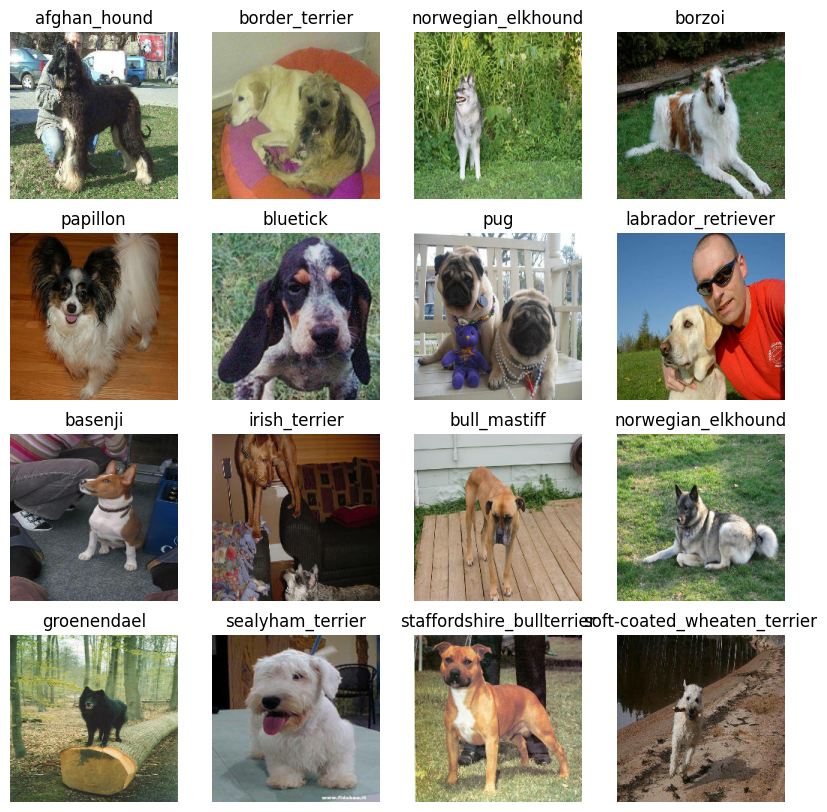

In [37]:
show_16_images(images , labels)

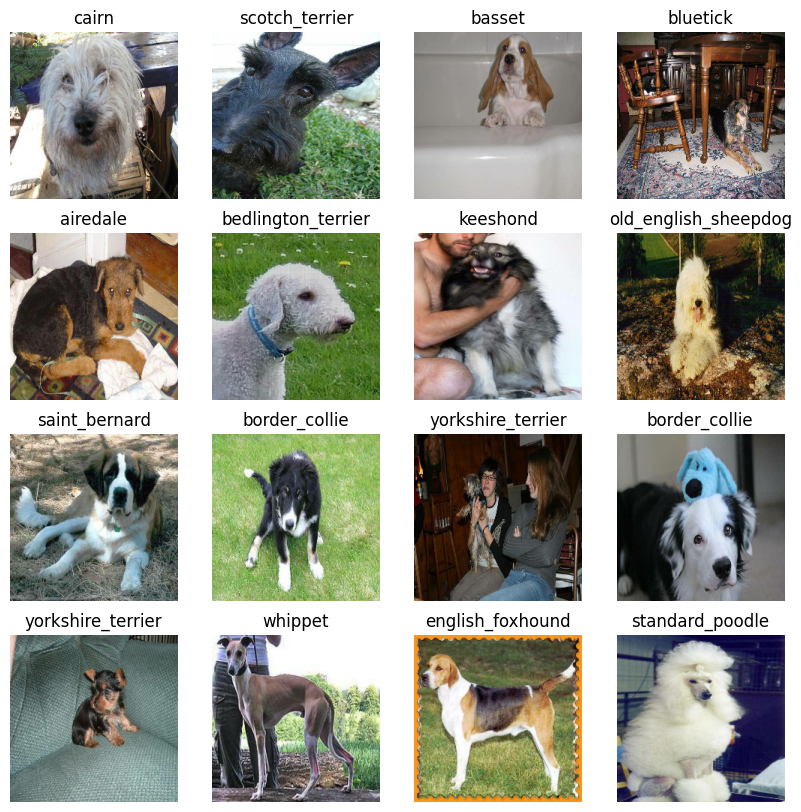

In [38]:
val_images , val_labels = next(valid_data.as_numpy_iterator())
show_16_images(val_images , val_labels)

## Building a model

Before we build a model, there are few things we need to define:
* The input shape (our our image shape(IMG_SIZE) in form of tensors) to our model.
* The output shape (image labels, in forms of tensors  ) of the model.
* The URL of model we want to use from Kaggle - https://www.kaggle.com/models/google/mobilenet-v2/tensorFlow2/130-224-classification/2?tfhub-redirect=true 


In [39]:
IMG_SIZE

224

In [40]:
# setup the input shape to the model
INPUT_SHAPE = [None , IMG_SIZE , IMG_SIZE , 3]

# setuo the output shape  to the model
OUTPUT_SHAPE = len(unique_breeds)

# setup model URL from tensorflowhub 
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5"

In [41]:
INPUT_SHAPE , OUTPUT_SHAPE

([None, 224, 224, 3], 120)

Now we've got our inputs , outputs and model ready to go.
let's put them together into a keras deep learning model!

Knowing this, let's create a function which:
* Takes the input shape , output shape and the model we've chosen as paramters.
* Defines the layers in a keras model in sequential fashion (do this first , then this , then that ).
* Compiles the model (say it should be evaluated and improved).
* Build the model (tell the model the input shape it'll be getting).
* Returns the model.

All of these steps can be found here: https://www.tensorflow.org/guide/keras

In [42]:
# creating function for building keras model 
def create_model(input_shape = INPUT_SHAPE , output_shape = OUTPUT_SHAPE , model_url = MODEL_URL):
    print("building model with :", MODEL_URL)


    # setup the model layers
    model = tf.keras.Sequential([
        hub.KerasLayer(model_url),  # layer 1 input layer
        # tf.keras.layers.Dense(units = 600,
                              # activation ="softmax"),    # layer 2
        tf.keras.layers.Dense(units=output_shape,
                              activation= "softmax")   # layer 3 (output layer)
    ])

    # compile the model
    model.compile(
        loss = tf.keras.losses.CategoricalCrossentropy(),
        optimizer = tf.keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )

    # build the model 
    model.build(input_shape)

    return model

In [43]:
model = create_model()
model.summary()

building model with : https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              6158505   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 6,278,745
Trainable params: 120,240
Non-trainable params: 6,158,505
_________________________________________________________________


## Creating Callbacks

Callbacks are helper function a model can use during training to do such things as save its progress, check its progress or stop trainig early if a model stop improving.


We'll create two callbacks , one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.


### TensorBoard Callback

To setup a TensorBoard callback , we need to do 3 things:

1. Load the tensorBoard notebook extension.
2. Create a TensorBoard callback which is able to save logs to a directly and pass it to our model's fit() function.
3. Visualize our models trainig log with the `%tensorboard` magic function (we'll do this after model training).


https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback





In [44]:
# Load the tensorboard notebook extension
%load_ext tensorboard

In [45]:
import datetime

def create_tensorboard_callback():
    """
    create a function for calling tensorboard callback to record all progress
    """
    # create logdir for recording all tensorboard  logs
    logdir = os.path.join("dog-breed-identification/logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

    return tf.keras.callbacks.TensorBoard(logdir)

## Early stopping callbacks

Early stopping help our model from overfitting by stopping training if a certain metric stop improving'

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [46]:
# create a early stopping callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy",
                                                  patience = 3)

## Training a model (on subset of data)

Our first model is only going to train on 1000 images, to make sure everything is wrong.

In [47]:
NUM_EPOCHS = 100

In [48]:
# check to make sure we're still  running on a GPU
print("GPU", "available(YESSS!!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available(YESSS!!!!!!)


In [49]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Let's create function which train a model 

* create a model using create_model()
* setup callback using create_tensorboard_callback() and earlystopping callbacks
* call the `fit()` function on our model passing it training data , validation data , callbacks , NUM_EPOCHS.
* And return the model.


In [50]:
# build the function to train and return a trained model
def train_model():
    """
    train a model and return a trained model
    """
    # create a model
    model = create_model()

    # fit the data to model and calling all the callbacks
    model.fit(x=train_data,
             epochs = NUM_EPOCHS,
             validation_data = valid_data,
             validation_freq = 1,
             callbacks = [create_tensorboard_callback() , early_stopping])

    return model

In [51]:
# fit the train data to the model
model = train_model()

building model with : https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5
Epoch 1/100
50/50 [==============================] - 29s 166ms/step - loss: 4.1154 - accuracy: 0.1713 - val_loss: 2.8650 - val_accuracy: 0.3650
Epoch 2/100
50/50 [==============================] - 6s 121ms/step - loss: 1.0297 - accuracy: 0.8225 - val_loss: 1.7748 - val_accuracy: 0.6050
Epoch 3/100
50/50 [==============================] - 7s 136ms/step - loss: 0.2932 - accuracy: 0.9787 - val_loss: 1.5176 - val_accuracy: 0.6300
Epoch 4/100
50/50 [==============================] - 6s 109ms/step - loss: 0.1306 - accuracy: 0.9987 - val_loss: 1.4217 - val_accuracy: 0.6500
Epoch 5/100
50/50 [==============================] - 7s 132ms/step - loss: 0.0800 - accuracy: 1.0000 - val_loss: 1.3769 - val_accuracy: 0.6500
Epoch 6/100
50/50 [==============================] - 7s 140ms/step - loss: 0.0566 - accuracy: 1.0000 - val_loss: 1.3519 - val_accuracy: 0.6650
Epoch 7/100
50/50 [============================

###  Checking the tensorboard logs
The tensorboard magic function (%tensorboard) will access the logs directory we created earlier and visualize its contents

In [52]:
%tensorboard --logdir dog-breed-identification/logs

Reusing TensorBoard on port 6006 (pid 1476), started 3 days, 22:07:26 ago. (Use '!kill 1476' to kill it.)

In [53]:
!kill 1476

'kill' is not recognized as an internal or external command,
operable program or batch file.


In [54]:
%tensorboard --logdir dog-breed-identification/logs --port 6007

## Making and Evaluating prediction using a trained model

In [56]:
# making prediction on validation data
predictions = model.predict(valid_data , verbose=2)

13/13 - 1s - 1s/epoch - 97ms/step


In [59]:
predictions.shape , type(predictions)

((200, 120), numpy.ndarray)

In [60]:
np.sum(predictions[0])

1.0000001

In [64]:
index = 7
print(predictions[index])
print(f"max value (probability of prediction): {np.max(predictions[index])}")
print(f"sum: {np.sum(predictions[index])}")
print(f"max index {np.argmax(predictions[index])}")
print(f"predicted labels : {unique_breeds[np.argmax(predictions[index])]}")

[3.7083289e-05 5.5092936e-05 3.9710062e-06 2.0228843e-05 7.2218914e-05
 6.2843296e-06 1.2279947e-05 4.4973885e-06 3.3804867e-05 9.3221792e-07
 9.1804232e-04 8.5211614e-05 4.4594390e-07 8.8654106e-06 3.3549346e-05
 5.6959041e-05 1.2894441e-06 2.6396078e-06 5.3383160e-06 1.7370963e-05
 4.6300876e-04 1.1477805e-05 3.5934702e-06 1.3765192e-04 1.0224194e-06
 1.7000044e-04 8.3611143e-05 1.0576400e-05 6.7300465e-07 9.4296456e-07
 4.6249843e-06 3.7590173e-04 6.1010037e-06 1.6433296e-05 7.3658157e-06
 2.7002327e-03 1.1865341e-06 2.4718718e-06 1.6490912e-05 3.5706282e-07
 5.0945255e-05 8.6497550e-07 3.7768834e-06 2.5054617e-06 3.6478158e-07
 9.8015262e-06 6.1547330e-06 4.4446952e-06 3.9562812e-05 1.9683559e-07
 1.2417841e-05 8.1697081e-06 2.2902736e-04 5.5742836e-05 9.6127642e-06
 4.7204285e-06 7.4550222e-08 4.7592826e-07 6.8334094e-07 1.9824466e-04
 2.4711173e-06 2.1383721e-06 3.7972182e-05 1.5069421e-06 8.4726955e-05
 3.6148687e-03 4.7314330e-05 5.3592971e-06 1.6067283e-04 2.4647499e-05
 2.457

Having the above functionality is great but we want to able to do it at scale

and it would be even better if we could see the image the predicion is being made on!

**Note:** Predictions probabilities are also known as confidence labels

In [62]:
# Turn predictions probabilities into respective label 
def get_pred_label(prediction_probabilities):
    """
    Turn an array of prediction probabilities into a label
    """
    return unique_breeds[np.argmax(prediction_probabilities)]

In [65]:
get_pred_label(predictions[7])

'old_english_sheepdog'

Now we've our validation data in batch , we'll have to unbatchify it to compare those images to real labels and predictions labels

In [69]:
# create a function to unbatchify batches like valid_data
def unbatchify(data):
    """
    Take batch dataset (image , label) tensor and return a seperate array of images and labels
    """
    images = []
    labels = []
    # loop through 
    for image , label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(get_pred_label(label))
    return images , labels

In [70]:
val_images , val_labels = unbatchify(valid_data)

In [71]:
type(val_images) , len(val_images)

(list, 200)

In [72]:
type(val_labels) , len(val_labels)

(list, 200)

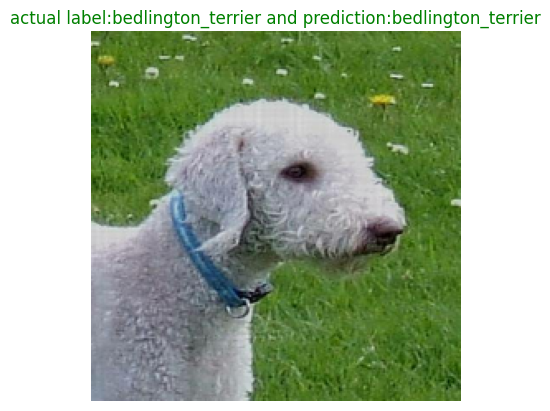

In [90]:
plt.imshow(val_images[5])
plt.title(f"actual label:{val_labels[5]} and prediction:{get_pred_label(predictions[5])}" , color="green")
plt.axis("off");

Now we've got our ways to get:
* prediction labels
* valid labels(truth labels)
* valid images

Let's make some function to make these all a bit more visualize.

we'll create a function which:
* Takes an array of prediction probabilities , an array of truth labels and an array of images and integers
* convert the predictions probabilities of a predicted label.
* plot the predicted labels, its predicted probability , the truth label and the target image on a single plot.


In [129]:
def plot_pred(prediction_probabilities , labels , images , n=1):
    """
    view the prediction , ground truth and images for sample n
    """

    pred_prob , true_label , image = prediction_probabilities[n] , labels[n] , images[n]
    
    # get the pred label
    pred_label = get_pred_label(pred_prob)

    # plot the image and remove the ticks
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    # change the color of the title depending on if the predictions is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color= "red"

    # title of plot of image as label and predicted label
    plt.title("{}:{:2.0f}% True label:{}".format(pred_label , np.max(pred_prob)*100 , true_label) , color= color)
    

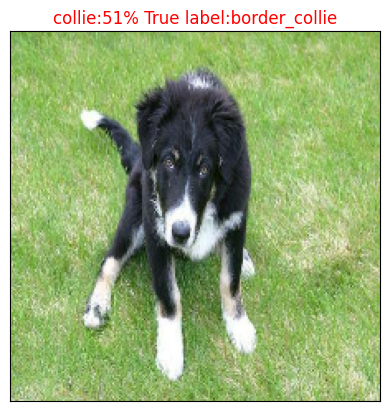

In [133]:
plot_pred(predictions ,val_labels , val_images , 9)

Now we've got one function to visualize our models top prediction , let's make another to view our models top 10 predictions.

This function will:
* Take an input of prediction probabilities array and a ground truth array and an integer
* find  the prediction using `get_pred_label()`
* find the top 10:
  * prediction probabilities indexes
  * prediction probabilities values
  * prediction labels
* Plot the 10 prediction probability values and labels , coloring the true label green

In [131]:
def plot_pred_conf(prediction_probabilities , labels , n=1):
    """
    plus the top 10 highest prediction confidence along with the truth 
    label for sample n.
    """
    pred_prob , true_label = prediction_probabilities[n] , labels[n]

    # get the predicted label
    pred_label = get_pred_label(pred_prob)

    # fing the top 10 prediction confidence indexes
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
    # find the top 10 prediction confidence values
    top_10_pred_values = pred_prob[top_10_pred_indexes]
    # find the top 10 prediction labels 
    top_10_pred_labels = unique_breeds[top_10_pred_indexes]
    
    # setup plot 
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
    top_10_pred_values,
    color="grey")
    plt.xticks(np.arange(len(top_10_pred_labels)),
              labels=top_10_pred_labels,
              rotation="vertical")

    # change color of true label
    if np.isin(true_label , top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
    else:
        pass

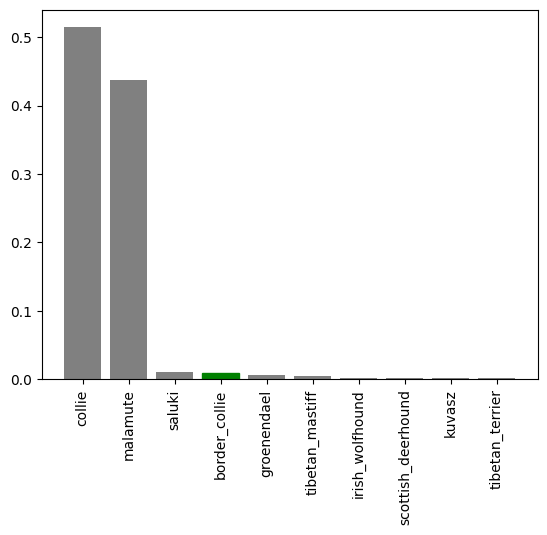

In [132]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

now we've got some function to help us visulize our prediction and evaluate our model, let's check out few.

<function matplotlib.pyplot.show(close=None, block=None)>

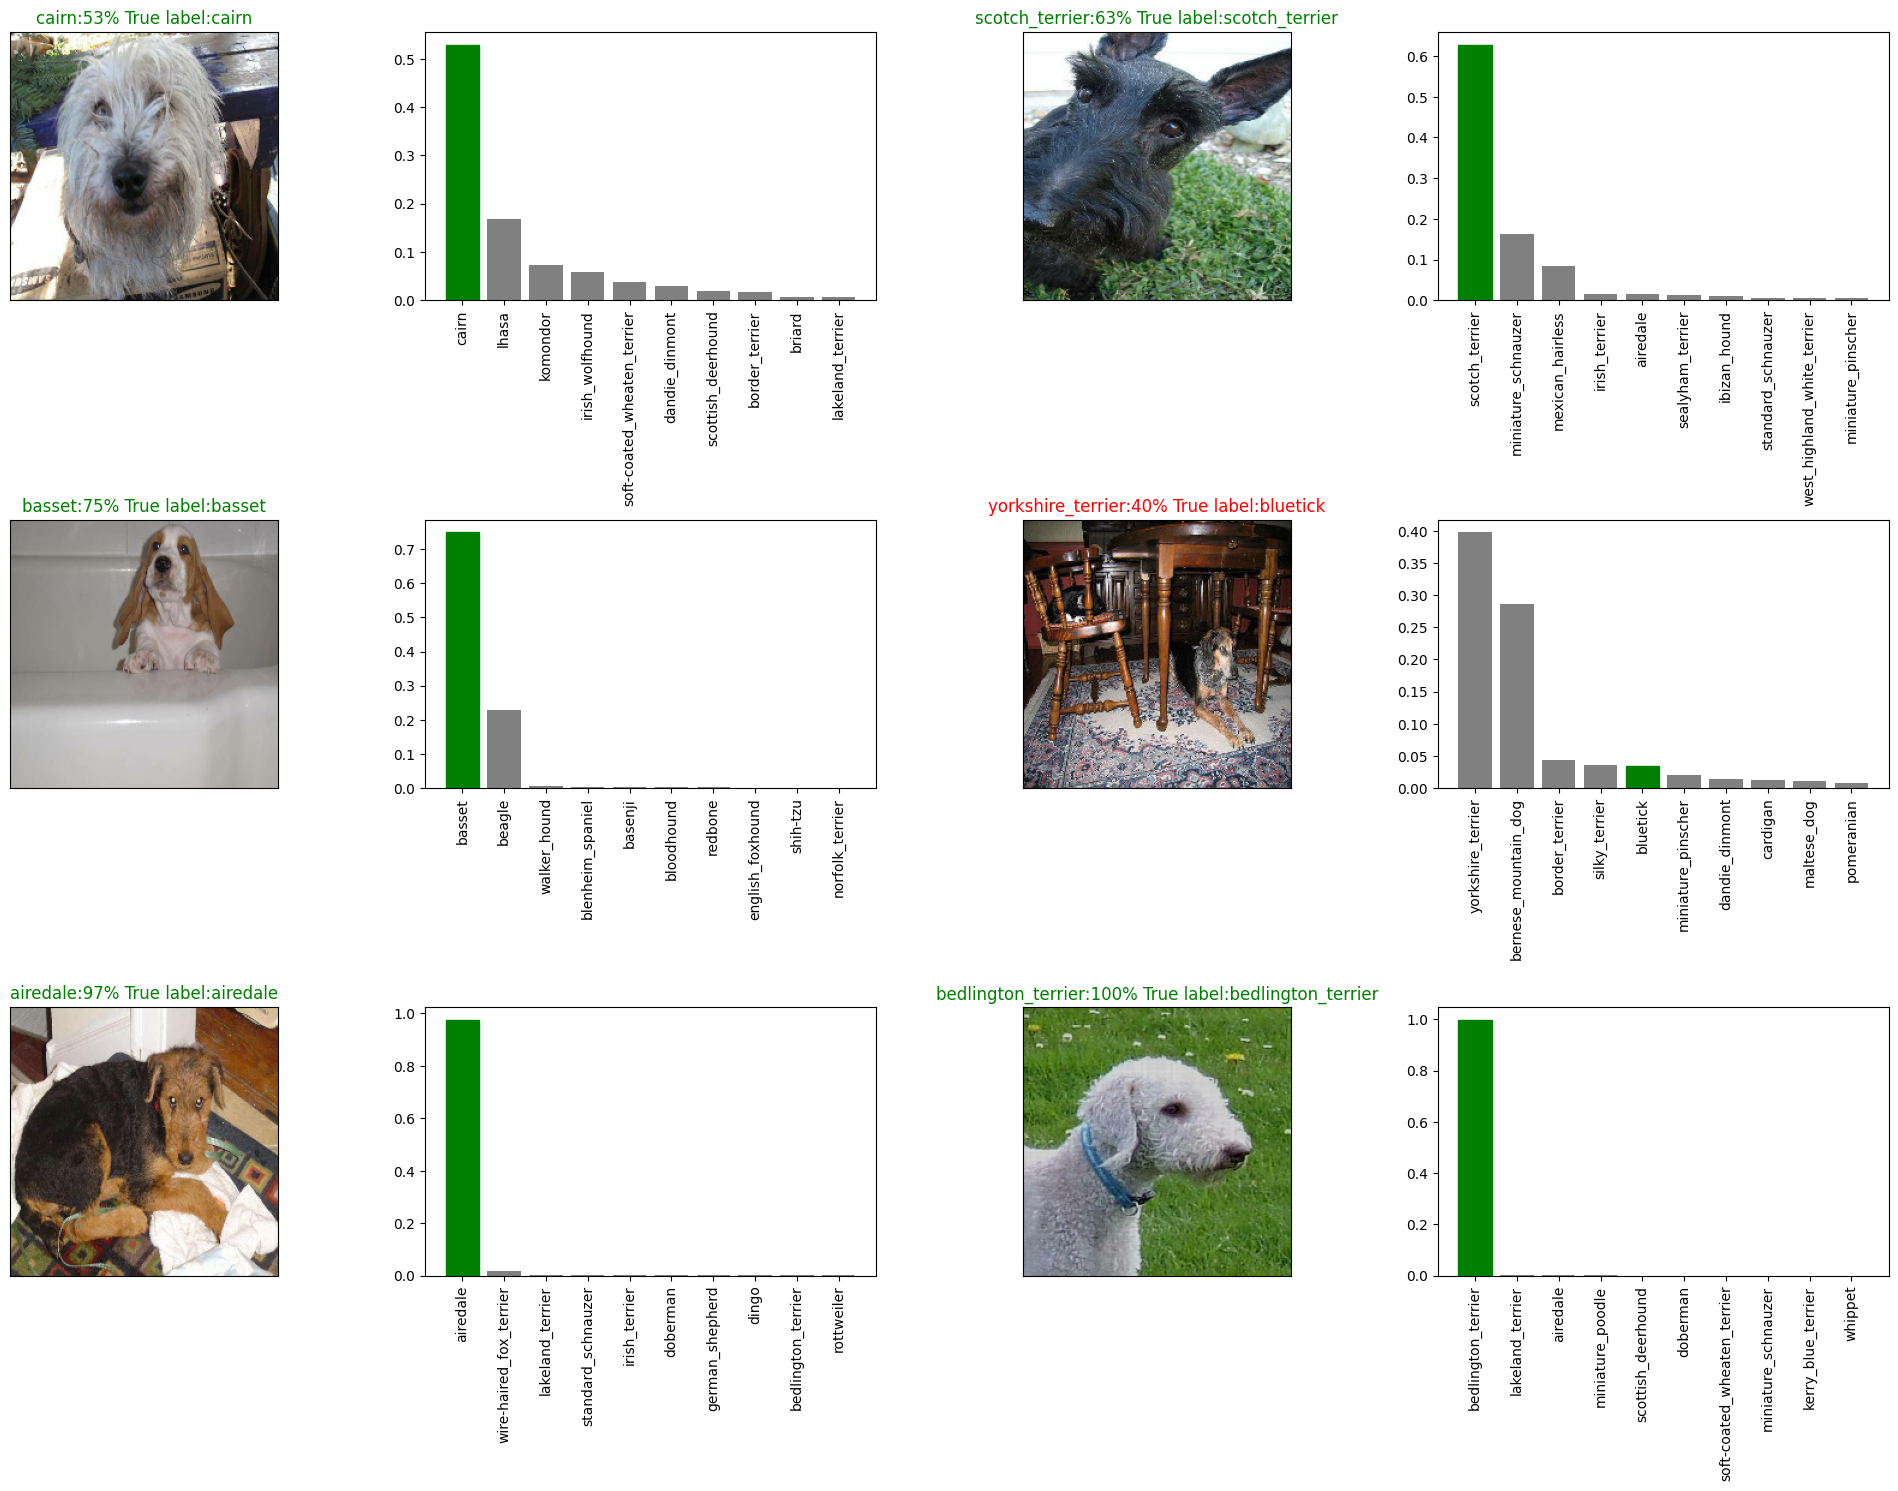

In [137]:
# let's check out a few prediction and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows* num_cols
plt.figure(figsize = (10*num_cols , 5* num_rows))
for i in range(num_images):
    plt.subplot(num_rows , 2*num_cols, 2*i+1)
    plot_pred(prediction_probabilities= predictions,
    labels = val_labels,
    images = val_images,
    n= i+i_multiplier)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_pred_conf(prediction_probabilities=predictions,
    labels= val_labels,
    n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show

## Saving and loading a trained model

In [138]:
# create function to save a model 
def save_model(model , suffix = None):
    """
    save a given model in a models directory  and appends a suffix (string).
    """
    # create a model directory pathname with current time
    modeldir = os.path.join("dog-breed-identification/models",
    datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    model_path = modeldir + "-" + suffix + ".h5"    # save format of model
    print(f"Saving model to: {model_path}......")
    model.save(model_path)
    return model_path

In [139]:
# create a function to load a trained model
def load_model(model_path):
    """
    Loads a saved model from a specified path.
    """
    print(f"Loading saved model from: {model_path}")
    model = tf.keras.models.load_model(model_path,custom_objects = {"KerasLayer": hub.KerasLayer})
    return model

Now we've got functions to save and load a trained model, let's make they work!

In [140]:
# save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2(v-140-224)-Adam")


Saving model to: dog-breed-identification/models\20250903-150229-1000-images-mobilenetv2(v-140-224)-Adam.h5......


'dog-breed-identification/models\\20250903-150229-1000-images-mobilenetv2(v-140-224)-Adam.h5'

### Training model in full data 

In [141]:
len(X) , len(y)

(10222, 10222)

In [142]:
# let's split our data into train and validation sets
from sklearn.model_selection import train_test_split


# split them into training and validation of total size NUM_IMAGES
X_train , X_val , y_train , y_val = train_test_split( X,
                                                      y,
                                                      test_size = 0.2,
                                                      random_state =42)

len(X_train) , len(X_val) , len(y_train) , len(y_val)

(8177, 2045, 8177, 2045)

In [143]:
# creating training and validation data batches
train_data = create_data_batches(X_train , y_train , batch_size = 16 , valid_data = False , test_data=False)
val_data = create_data_batches(X_val , y_val , batch_size = 16 , valid_data = True , test_data=False)

creating training data batches.....
creating validation data batches.....


In [144]:
len(train_data) , len(val_data)

(512, 128)

In [145]:
images , labels = next(train_data.as_numpy_iterator())

In [146]:
images.shape , labels.shape

((16, 224, 224, 3), (16, 120))

In [147]:
model_train_validation_full_data = create_model()

building model with : https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5


In [148]:
model_train_validation_full_data.fit(x=train_data,
                          epochs = NUM_EPOCHS,
                          validation_data = val_data,
                          validation_freq=1,
                          callbacks=[create_tensorboard_callback() , early_stopping])

Epoch 1/100
512/512 [==============================] - 113s 204ms/step - loss: 1.2832 - accuracy: 0.6803 - val_loss: 0.6613 - val_accuracy: 0.8000
Epoch 2/100
512/512 [==============================] - 63s 123ms/step - loss: 0.3252 - accuracy: 0.9040 - val_loss: 0.6763 - val_accuracy: 0.8029
Epoch 3/100
512/512 [==============================] - 45s 87ms/step - loss: 0.1639 - accuracy: 0.9567 - val_loss: 0.6683 - val_accuracy: 0.8020
Epoch 4/100
512/512 [==============================] - 46s 89ms/step - loss: 0.0979 - accuracy: 0.9796 - val_loss: 0.6638 - val_accuracy: 0.8122
Epoch 5/100
512/512 [==============================] - 46s 90ms/step - loss: 0.0645 - accuracy: 0.9878 - val_loss: 0.6744 - val_accuracy: 0.8142
Epoch 6/100
512/512 [==============================] - 46s 89ms/step - loss: 0.0422 - accuracy: 0.9930 - val_loss: 0.6898 - val_accuracy: 0.8015
Epoch 7/100
512/512 [==============================] - 44s 86ms/step - loss: 0.0302 - accuracy: 0.9969 - val_loss: 0.6914 - val

### Making prediction  on test dataset 

Since our  model has been trained on images in the form of Tensor batches , to make predictions on the test data , we'll have to get it into the same format.

Luckily we created `create_data_batches()` earlier which can take a list of filenames as input and cover them into Tensor batches.

To make predictions on the test data, we'll :
* Get the test image filenames.
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True` (since the test data doesn't have labels).
* Make a predictions array by passing the test batches to the `predict()` method called on our model.

In [150]:
# create a list of test filenames
file_path = 'dog-breed-identification/test/'
test_filenames = [file_path+fname  for fname in os.listdir(file_path)]

In [160]:
len(test_filenames) , test_filenames[:10]

(10357,
 ['dog-breed-identification/test/000621fb3cbb32d8935728e48679680e.jpg',
  'dog-breed-identification/test/00102ee9d8eb90812350685311fe5890.jpg',
  'dog-breed-identification/test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
  'dog-breed-identification/test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
  'dog-breed-identification/test/001a5f3114548acdefa3d4da05474c2e.jpg',
  'dog-breed-identification/test/00225dcd3e4d2410dd53239f95c0352f.jpg',
  'dog-breed-identification/test/002c2a3117c2193b4d26400ce431eebd.jpg',
  'dog-breed-identification/test/002c58d413a521ae8d1a5daeb35fc803.jpg',
  'dog-breed-identification/test/002f80396f1e3db687c5932d7978b196.jpg',
  'dog-breed-identification/test/0036c6bcec6031be9e62a257b1c3c442.jpg'])

In [152]:
# creating test data batches
test_data = create_data_batches(test_filenames , test_data = True)

creating test data batches.....


In [153]:
test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [154]:
len(test_data)

648

**Note:** Calling predict() on our full data model and passing it the test data batch will not take a long time to run because we're using GPU

In [156]:
# make a prediction on test data batch using the loaded full model 
test_predictions = model_train_validation_full_data.predict(test_data,
                                                            verbose =1) 

648/648 [==============================] - 55s 82ms/step


In [158]:
test_predictions.shape,test_predictions[0].shape

((10357, 120), (120,))

In [161]:
type(test_predictions)

numpy.ndarray

## Preparing Test Dataset Predictions For Kaggle

Looking at the kaggle sample submission, we find that it wants our models prediction probablity outputs in a DataFrame with an ID and a column for each different dog breed.
www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

To get the data in this format, we'll:
* Create a pandas DataFrame with an ID column as well as a column for each dog breed
* Add data to the ID column by extracting the test image ID's from their filepaths.
* Add data (the prediction probabilities) to each of the dog breed columns.
* Export the dataframe as a CSV to submit it to Kaggle.

In [162]:
# create a pandas dataframe with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))

In [163]:
preds_df

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [164]:
# Append test image ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(file_path)]
preds_df["id"] = test_ids

In [165]:
preds_df

id affenpinscher afghan_hound  \
0      000621fb3cbb32d8935728e48679680e           NaN          NaN   
1      00102ee9d8eb90812350685311fe5890           NaN          NaN   
2      0012a730dfa437f5f3613fb75efcd4ce           NaN          NaN   
3      001510bc8570bbeee98c8d80c8a95ec1           NaN          NaN   
4      001a5f3114548acdefa3d4da05474c2e           NaN          NaN   
...                                 ...           ...          ...   
10352  ffeda8623d4eee33c6d1156a2ecbfcf8           NaN          NaN   
10353  fff1ec9e6e413275984966f745a313b0           NaN          NaN   
10354  fff74b59b758bbbf13a5793182a9bbe4           NaN          NaN   
10355  fff7d50d848e8014ac1e9172dc6762a3           NaN          NaN   
10356  fffbff22c1f51e3dc80c4bf04089545b           NaN          NaN   

      african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                     NaN      NaN                            NaN         NaN   
1                     NaN      NaN                            NaN         NaN   
2                     NaN      NaN                            NaN         NaN   
3                     NaN      NaN                            NaN         NaN   
4                     NaN      NaN                            NaN         NaN   
...                   ...      ...                            ...         ...   
10352                 NaN      NaN                            NaN         NaN   
10353                 NaN      NaN                            NaN         NaN   
10354                 NaN      NaN                            NaN         NaN   
10355                 NaN      NaN                            NaN         NaN   
10356                 NaN      NaN                            NaN         NaN   

      australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                    NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                    NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                    NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                    NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                    NaN     NaN    NaN  ...        NaN         NaN    NaN   
...                  ...     ...    ...  ...        ...         ...    ...   
10352                NaN     NaN    NaN  ...        NaN         NaN    NaN   
10353                NaN     NaN    NaN  ...        NaN         NaN    NaN   
10354                NaN     NaN    NaN  ...        NaN         NaN    NaN   
10355                NaN     NaN    NaN  ...        NaN         NaN    NaN   
10356                NaN     NaN    NaN  ...        NaN         NaN    NaN   

      walker_hound weimaraner welsh_springer_spaniel  \
0              NaN        NaN                    NaN   
1              NaN        NaN                    NaN   
2              NaN        NaN                    NaN   
3              NaN        NaN                    NaN   
4              NaN        NaN                    NaN   
...            ...        ...                    ...   
10352          NaN        NaN                    NaN   
10353          NaN        NaN                    NaN   
10354          NaN        NaN                    NaN   
10355          NaN        NaN                    NaN   
10356          NaN        NaN                    NaN   

      west_highland_white_terrier whippet wire-haired_fox_terrier  \
0                             NaN     NaN                     NaN   
1                             NaN     NaN                     NaN   
2                             NaN     NaN                     NaN   
3                             NaN     NaN                     NaN   
4                             NaN     NaN                     NaN   
...                           ...     ...                     ...   
10352                         NaN     NaN                     NaN   
10353                         NaN     NaN                    

In [167]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df

id  affenpinscher  afghan_hound  \
0      000621fb3cbb32d8935728e48679680e   2.340693e-07  6.815976e-08   
1      00102ee9d8eb90812350685311fe5890   1.138896e-09  4.456947e-09   
2      0012a730dfa437f5f3613fb75efcd4ce   1.372291e-10  5.523032e-05   
3      001510bc8570bbeee98c8d80c8a95ec1   2.645985e-02  1.787902e-10   
4      001a5f3114548acdefa3d4da05474c2e   4.028112e-04  1.429539e-05   
...                                 ...            ...           ...   
10352  ffeda8623d4eee33c6d1156a2ecbfcf8   8.090909e-10  5.416412e-07   
10353  fff1ec9e6e413275984966f745a313b0   2.571514e-08  1.622403e-08   
10354  fff74b59b758bbbf13a5793182a9bbe4   4.125726e-10  2.245350e-09   
10355  fff7d50d848e8014ac1e9172dc6762a3   2.840763e-06  4.182124e-06   
10356  fffbff22c1f51e3dc80c4bf04089545b   7.854870e-11  3.200608e-07   

       african_hunting_dog      airedale  american_staffordshire_terrier  \
0             5.136475e-09  4.004894e-09                    1.497350e-09   
1             1.185854e-08  9.062790e-09                    4.350932e-08   
2             6.814025e-09  3.501731e-07                    3.401946e-09   
3             1.319448e-11  1.851164e-08                    5.842313e-10   
4             3.534982e-08  4.591898e-08                    2.682821e-09   
...                    ...           ...                             ...   
10352         3.854382e-08  1.445349e-07                    7.415557e-08   
10353         1.253807e-09  3.230838e-06                    1.554253e-07   
10354         3.701684e-07  4.498022e-13                    5.917083e-10   
10355         5.545449e-09  4.475035e-11                    2.595686e-09   
10356         1.094781e-08  1.241647e-08                    9.561715e-09   

        appenzeller  australian_terrier       basenji        basset  ...  \
0      7.978641e-09        4.596383e-09  1.629485e-08  3.427492e-07  ...   
1      1.734529e-10        1.612473e-09  9.974822e-11  4.202714e-10  ...   
2      1.409409e-08        1.713491e-07  2.191396e-11  3.648439e-06  ...   
3      2.246207e-08        1.687575e-09  1.954694e-06  8.874012e-08  ...   
4      8.234280e-09        6.825707e-08  8.857056e-09  6.422672e-08  ...   
...             ...                 ...           ...           ...  ...   
10352  4.253951e-10        7.938822e-10  3.884601e-10  9.290687e-10  ...   
10353  8.005194e-11        5.789640e-07  1.541022e-09  5.779198e-09  ...   
10354  1.418067e-07        7.456188e-07  4.095746e-09  6.614267e-10  ...   
10355  1.599738e-10        7.761624e-07  9.313060e-09  2.467251e-08  ...   
10356  1.222204e-08        2.773051e-11  5.713570e-09  1.265965e-09  ...   

         toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0      1.237018e-08  5.362147e-09  5.956452e-08  7.976587e-09  1.772954e-08   
1      2.813328e-08  6.624960e-11  4.925731e-08  1.005886e-06  2.576239e-08   
2      2.131174e-10  1.132528e-08  9.732296e-08  2.109912e-07  6.626705e-08   
3      9.095237e-12  9.552219e-12  6.692147e-08  7.093637e-09  4.163616e-13   
4      1.184886e-07  2.319088e-09  8.461784e-09  2.432587e-07  5.653449e-10   
...             ...           ...           ...           ...           ...   
10352  2.978129e-06  4.827891e-08  2.948051e-08  4.840793e-05  8.426122e-07   
10353  6.309069e-06  4.264785e-09  1.024411e-03  1.530470e-06  4.434422e-01   
10354  1.539711e-10  4.387729e-09  8.274850e-09  4.954008e-10  2.716428e-09   
10355  9.800979e-07  6.696618e-09  9.485904e-08  1.758635e-09  8.654903e-09   
10356  2.125904e-11  8.262289e-10  5.509485e-08  3.140958e-09  3.913069e-07   

       welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0                8.159728e-11                 2.227677e-10  5.365993e-09   
1                1.630980e-08                 6.529716e-08  6.653624e-09   
2                1.302886e-03                 5.593850e-09  2.925203e-09   
3                6.107013e-11                 6.546410e-11  5.822556e-06   
4                

In [168]:
# save our prediciton dataframe to CSV for submission to kaggle 
preds_df.to_csv("dog-breed-identification/full_model_predictions_submission_1_mobilenetV2-ver-140-224.csv",
                index=False)

## making prediction on custom images

To make prediction on custom images, we'll:
* Get the filepaths of our own images.
* Turn the filepaths into data batches using `create_data_batches()`. And since our custom images won't have labels, we set the `test_data` parameter to `True`.
* Pass the custom images data batch to our model's `predict()` method.
* convert the prediction output probabilities to prediction labels.
* compare the predicted labels to the custom images.

In [183]:
# get custom folder filepaths
custom_path = "dog-breed-identification/custom_photo/"

# creating list of images's filepaths
custom_images = [custom_path+fname for fname in os.listdir(custom_path)]

In [184]:
custom_images

['dog-breed-identification/custom_photo/WhatsApp Image 2025-08-28 at 20.49.24_fc062380.jpg',
 'dog-breed-identification/custom_photo/WhatsApp Image 2025-08-28 at 21.13.33_bdc45189.jpg']

In [185]:
# creating data batches from filepath
custom_data_batch = create_data_batches(X= custom_images , test_data = True)

creating test data batches.....


In [186]:
len(custom_data_batch)

1

In [187]:
model_train_validation_full_data.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              6158505   
                                                                 
 dense_2 (Dense)             (None, 120)               120240    
                                                                 
Total params: 6,278,745
Trainable params: 120,240
Non-trainable params: 6,158,505
_________________________________________________________________


In [188]:
custom_prediction = model_train_validation_full_data.predict(x = custom_data_batch,
                                              verbose=1)

1/1 [==============================] - 1s 1s/step


In [189]:
unbatch_custom_images = []
for image in custom_data_batch.unbatch().as_numpy_iterator():
    unbatch_custom_images.append(image)

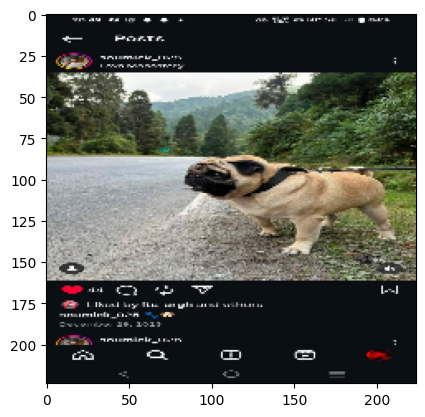

In [190]:
plt.imshow(unbatch_custom_images[0])

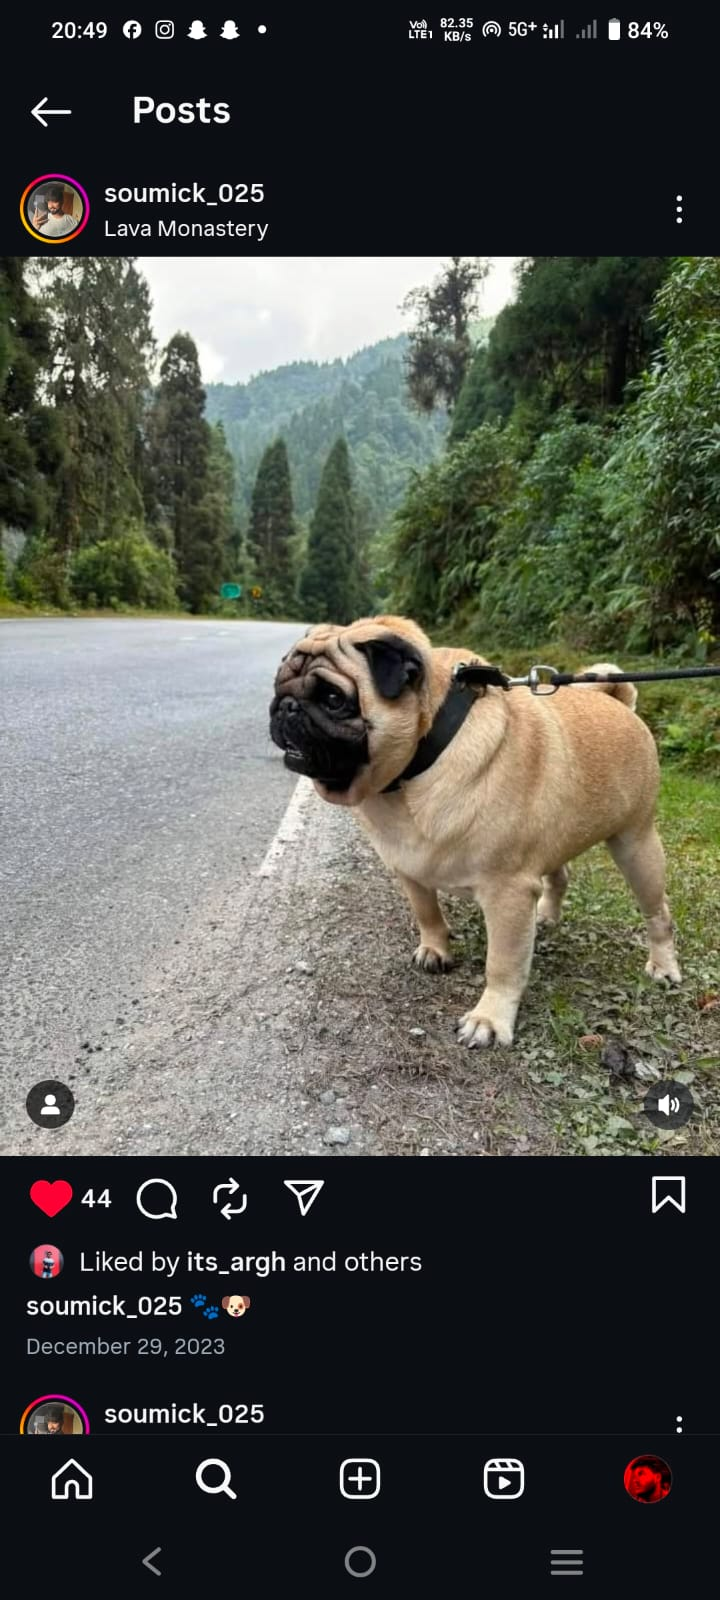

In [191]:
Image(custom_images[0])

In [192]:
unique_breeds[np.argmax(custom_prediction[0])]

'pug'

In [193]:
custom_prediction.shape

(2, 120)

In [194]:
# get custom images prediction labels
custom_pred_labels = [get_pred_label(custom_prediction[i]) for i in range(len(custom_prediction))]
custom_pred_labels

['pug', 'german_shepherd']

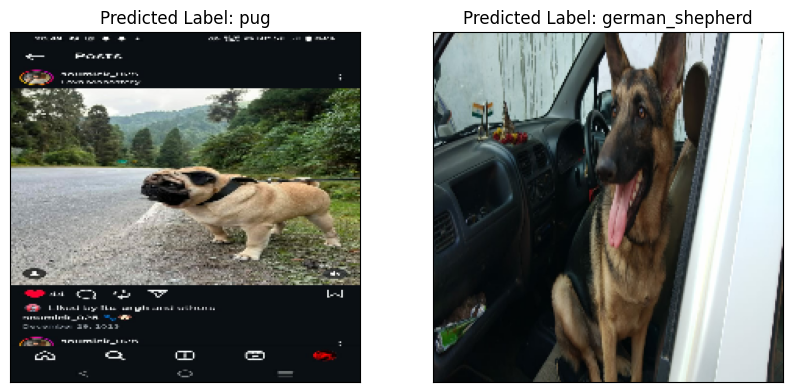

In [202]:
# check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(unbatch_custom_images):
    plt.subplot( 2 , 2 , i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title("Predicted Label: {}".format(custom_pred_labels[i]))
    plt.imshow(unbatch_custom_images[i])